<a href="https://colab.research.google.com/github/AmaniUsagi/AYTP/blob/master/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description: Sentiment Analysis Twitter**

In [1]:
# Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load Data
from google.colab import files
uploaded = files.upload()


Saving amani.csv to amani.csv


In [3]:
# Fetch Data
log = pd.read_csv('amani.csv')

In [4]:
# Twitter API Credentials
consumerKey = log['Key'][0]
consumerSecret = log['Key'][1]
accessToken = log['Key'][2]
accessTokenSecret = log['Key'][3]

In [5]:
# Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API Object for auth info
api = tweepy.API(authenticate, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Extract tweets from user
posts = api.user_timeline(screen_name= "BillGates", count = 1000, lang = "en", tweet_mode = "extended")
i = 1
# Printing tweets
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i + 1

1)The world can make COVID-19 the last pandemic: https://t.co/b3bHaQ3eLr https://t.co/wnKIfARZzh

2)The world wasn’t ready for COVID, but we can choose to be ready next time. https://t.co/ghjikJDkPf

3)I’m excited to chat with one of my favorite thinkers @FareedZakaria next week at @92Y! https://t.co/5tkkpBucjA

4)To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: https://t.co/jvpjjg1jUY

5)I’m looking forward to this chat with @amolrajan at @howtoacademy and @penguinlive. https://t.co/mw5OF9f8Aq



In [7]:
# Creating dataframe with column tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,The world can make COVID-19 the last pandemic:...
1,"The world wasn’t ready for COVID, but we can c..."
2,I’m excited to chat with one of my favorite th...
3,To avoid another COVID-19 – or worse – the wor...
4,I’m looking forward to this chat with @amolraj...


In [8]:
# Cleaning Data Fetched
def cleanTwt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes the @mentions
  text = re.sub(r'#', '', text) # Removes the hashtags
  text = re.sub(r'RT[\s]+', '', text) # Removes the retweet tag
  text = re.sub(r'https?:\/\/\S+', '', text) # Removes the hyperlinks

  return text

In [9]:
# Show Cleaned Tweets
df['Tweets'] = df['Tweets'].apply(cleanTwt)
df

,Tweets
0,The world can make COVID-19 the last pandemic:
1,"The world wasn’t ready for COVID, but we can c..."
2,I’m excited to chat with one of my favorite th...
3,To avoid another COVID-19 – or worse – the wor...
4,I’m looking forward to this chat with at and .
...,...
195,Everyone deserves equitable access to healthca...
196,"We’ve done this before. In 2017, the worked w..."
197,If we’re going to end the acute phase of the p...
198,"By investing in direct air capture, clean hydr..."


In [10]:
# Subjectivity Function
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Polarity Function
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Subjectivity & Polarity columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show columns
df


,Tweets,Subjectivity,Polarity
0,The world can make COVID-19 the last pandemic:,0.066667,0.000000
1,"The world wasn’t ready for COVID, but we can c...",0.333333,0.133333
2,I’m excited to chat with one of my favorite th...,0.583333,0.291667
3,To avoid another COVID-19 – or worse – the wor...,0.612500,-0.200000
4,I’m looking forward to this chat with at and .,0.000000,0.000000
...,...,...,...
195,Everyone deserves equitable access to healthca...,0.333333,0.333333
196,"We’ve done this before. In 2017, the worked w...",0.250000,0.250000
197,If we’re going to end the acute phase of the p...,0.650000,0.500000
198,"By investing in direct air capture, clean hydr...",0.450909,0.193939


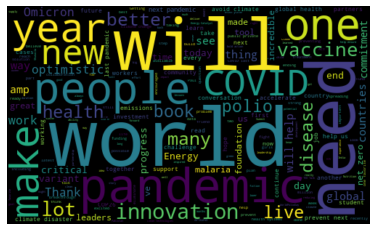

In [11]:
# Check for sentiment distribution by ploting wordcloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# Function to compute negative, neutral & positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Positive'
  else:
    return 'Positive'

In [13]:
# Show the Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,The world can make COVID-19 the last pandemic:,0.066667,0.000000,Positive
1,"The world wasn’t ready for COVID, but we can c...",0.333333,0.133333,Positive
2,I’m excited to chat with one of my favorite th...,0.583333,0.291667,Positive
3,To avoid another COVID-19 – or worse – the wor...,0.612500,-0.200000,Negative
4,I’m looking forward to this chat with at and .,0.000000,0.000000,Positive
...,...,...,...,...
195,Everyone deserves equitable access to healthca...,0.333333,0.333333,Positive
196,"We’ve done this before. In 2017, the worked w...",0.250000,0.250000,Positive
197,If we’re going to end the acute phase of the p...,0.650000,0.500000,Positive
198,"By investing in direct air capture, clean hydr...",0.450909,0.193939,Positive


In [14]:
# Print all Positive Tweets
j = 1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'): # Checks if the tweets in sorted dataframe has a Positive analysis
    print(str(j) + ')' + sortedDf['Tweets'][i])
    print()
    j = j + 1

1)The world can make COVID-19 the last pandemic:  

2)The world wasn’t ready for COVID, but we can choose to be ready next time. 

3)I’m excited to chat with one of my favorite thinkers  next week at ! 

4)I’m looking forward to this chat with  at  and . 

5)The best way to prevent pneumonia is to vaccinate children against the pathogens that cause it. This is an impressive effort. LongLifeForAll _INDIA 

6)Giving a TED talk is always a memorable (and nerve-wracking!) experience. Beyond the talk, I also got to listen to the stories of frontline workers and catch up with some of the people working to make the world a more equitable place: 

7)Each day, polio workers around the world cross mountains and deserts to bring vaccines to kids. It’s up to us to match their dedication with our support. EndPolio 

8)Building a software company is nothing compared to building a Roman fire bucket. I tried my hand at it for my latest TED Talk:  

9)The Global Fund is one of the kindest things people

In [15]:
# Print all Negative Tweets
j = 1
sortedDf = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Negative'): # Checks if the tweets in sorted dataframe has Negative analysis
    print(str(j) + ')' + sortedDf['Tweets'][i])
    print()
    j = j + 1

1)To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: 

2)We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: 
EarthDay 

3)Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that COVID will cost nearly $14 trillion. We can save trillions by spending billions. 

4)Changing mindsets is never easy, but Sudha Varghese empowers girls to believe in themselves and see their potential for greatness:  

5)Kakenya Ntaiya founded  to enable girls’ education and end harmful traditional practices like child marriage. Her story is a powerful example of how one person’s act of bravery can spark dramatic change.  

6): I’ve spent my life working in agriculture, so when I think beyond the humanitarian toll I’m seeing in Ukraine, my focus a…

7)What a devastating loss. P

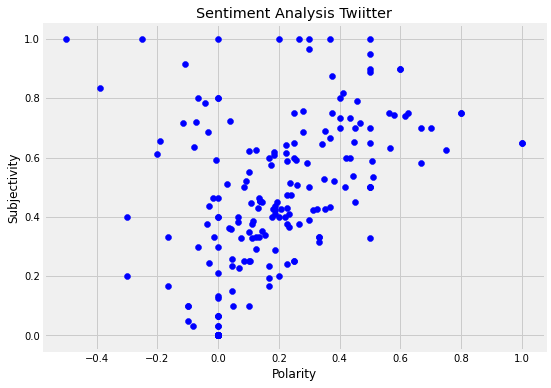

In [16]:
# Plot Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis Twiitter')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
# Percentage Positive
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) *100, 1)

86.5

In [18]:
# Percentage Negative
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) *100, 1)

13.5

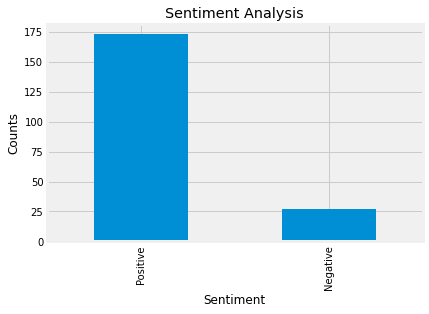

In [19]:
# Value Counts
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')